In [135]:
import pandas as pd

In [136]:
df = pd.read_excel("PVO exercise_mock data.xlsx")

In [137]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 3982 entries, 0 to 3981
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Account type                3982 non-null   str    
 1   Business Area               3982 non-null   str    
 2   Business Unit               3982 non-null   str    
 3   Commodity                   3982 non-null   str    
 4   Country                     3982 non-null   str    
 5   Country Code                3982 non-null   str    
 6   Division                    3982 non-null   str    
 7   ESN                         3982 non-null   str    
 8   ESN Description             3982 non-null   str    
 9   EUR                         3982 non-null   float64
 10  Fiscal Year (FY)            3982 non-null   int64  
 11  Location name               3982 non-null   str    
 12  Location type               3982 non-null   str    
 13  Organization ID             3982 non-null   

In [138]:
df["Purchase order number"] = df["Purchase order number"].astype(str)

In [139]:
df.describe()

,EUR,Fiscal Year (FY),Period
count,3982.000000,3982.0,3982.000000
mean,4959.012040,2025.0,6.497489
std,14943.115955,0.0,3.451515
min,139.021810,2025.0,1.000000
25%,1943.914892,2025.0,3.250000
50%,3317.910000,2025.0,6.000000
75%,4764.820622,2025.0,9.000000
max,528765.120000,2025.0,12.000000


A single fiscal year in data
Year over year comparissons not possible with provided data
Is it needed? 
Can we get data from previous years? 
Is that data in the same place as the one we have already?

In [140]:
df.head(1)

,Account type,Business Area,Business Unit,Commodity,Country,Country Code,Division,ESN,ESN Description,EUR,Fiscal Year (FY),Location name,Location type,Organization ID,Period,Purchase Order Description,Purchase order number,Region,Supplier Name
0,IND,SE GS C OPS LGN,SE GS C,Logistics - Project Transportation and Services,United States,US,SE GS,UBB,"SE: Project: multi-modal transportation, log. ...",3299.59178,2025,"Charlotte, Plant (US)",Plant,SEGSA3003326,1,Transportation Fee.,3010785821,North America,LS Cargo Logistics GmbH


In [141]:
df["Account type"].value_counts()

Account type
IND    3410
DIR     572
Name: count, dtype: int64

In [142]:
for col in df.columns:                                                                                                                                                                                                             
    if df[col].dtype == "object":                                                                                                                                                                                                  
        df[col] = df[col].str.strip()

In [143]:
dfdict = {}
for n in list(df.columns):
    dfdict[n] = {
        "type": df[n].dtype,
        "counts": len(df[n].value_counts())
    }
val_df = pd.DataFrame.from_dict(dfdict, orient='index')

In [144]:
val_df

,type,counts
Account type,str,2
Business Area,str,35
Business Unit,str,9
Commodity,str,6
Country,str,11
Country Code,str,11
Division,str,3
ESN,str,8
ESN Description,str,8
EUR,float64,3947


In [145]:
val_df=val_df[val_df["type"]=="str"]

In [146]:
val_df.sort_values(by='counts')

,type,counts
Location type,str,1
Account type,str,2
Division,str,3
Region,str,5
Commodity,str,6
ESN Description,str,8
ESN,str,8
Business Unit,str,9
Country Code,str,11
Country,str,11


In [147]:
# Are PO numbers unique or do they repeat?
df["Purchase order number"].duplicated().sum()

np.int64(73)

In [148]:
df[df["Purchase order number"].duplicated(keep=False)].sort_values("Purchase order number").head(10)

,Account type,Business Area,Business Unit,Commodity,Country,Country Code,Division,ESN,ESN Description,EUR,Fiscal Year (FY),Location name,Location type,Organization ID,Period,Purchase Order Description,Purchase order number,Region,Supplier Name
1219,IND,SE GS C OPS LSS,SE GS C,Logistics - Project Transportation and Services,Germany,DE,SE GS,QS9,SE: PE PL LOG only: Project Transport&related ...,5321.00000,2025,"Muelheim, Plant (DE)",Plant,SEGSA3003063,8,Nebenkosten,3010808210,Europe,Kahl Schwerlast GmbH
3223,IND,SE GS C OPS LGT,SE GS C,Logistics - Ground,Hungary,HU,SE GS,QSS,"SE: Road transportation, (Groupage, LTL, FTL)",2496.55213,2025,"Budapest, Plant (HU)",Plant,SEGSA3000679,8,inbound delivery from Germany_M2B,3010808210,Europe,Schenker Deutschland AG
3201,IND,SE TI STG NU G,SE TI STG,Logistics - Warehouse & Packaging,Germany,DE,SE TI,QHF,Packing services for the production of appropr...,6584.59000,2025,"Erfurt, Plant (DE)",Plant,SETIA1509593,10,Container Stauen 3000027968,3010812683,Europe,Deufol Nord GmbH
1719,IND,SE GS C OPS LSS,SE GS C,Logistics - Warehouse & Packaging,Germany,DE,SE GS,QSE,"Warehouse management, -business and addition. ...",9417.22000,2025,"Muelheim, Plant (DE)",Plant,SEGSA1508102,4,Monatsmiete Wesel 2024/2025,3010812683,Europe,Deufol West GmbH
3453,IND,SE GS C OPS LSS,SE GS C,Logistics - Project Transportation and Services,Germany,DE,SE GS,UBB,"SE: Project: multi-modal transportation, log. ...",2119.00000,2025,"Muelheim, Plant (DE)",Plant,SEGSA3004026,10,Mülheim WMH-Mülheim Hatec,3010813813,Europe,Ferdinand Hoevelmann Spedition GmbH
2829,IND,SE GS C OPS LSS,SE GS C,Logistics - Warehouse & Packaging,Germany,DE,SE GS,QHF,Packing services for the production of appropr...,2270.46000,2025,"Muelheim, Plant (DE)",Plant,SEGSA1508102,10,Verpackung Manzanillo 3000027772 A-02875,3010813813,Europe,Deufol West GmbH
3921,IND,SE GS C OPS LSS,SE GS C,Logistics - Project Transportation and Services,Germany,DE,SE GS,UBB,"SE: Project: multi-modal transportation, log. ...",51045.00000,2025,"Muelheim, Plant (DE)",Plant,SEGSA3003326,10,Nachlauf,3010819478,Europe,LS Cargo Logistics GmbH
3092,IND,SE GS C OPS LSS,SE GS C,Logistics - CEP,Germany,DE,SE GS,QST,"CEP-Cur, Express, Parcel, express, parcel, cou...",3760.10000,2025,"Muelheim, Plant (DE)",Plant,SEGSA3005422,9,Transport Deufol-FFM TV22 Trumbull,3010819478,Europe,HTL Transportlogistik Gesellschaft
3520,DIR,SE GT TR OPS R&T,SE GT TR,Logistics - Ground,Colombia,CO,SE GT,QSS,"SE: Road transportation, (Groupage, LTL, FTL)",2069.48898,2025,"Tenjo, TEJ Plant (CO)",Plant,SEGTA1506361,5,CT102982 Ratio 1200:5 MR_C800_200 VA,4500039545,Latin America,SERCARGA SAS
2610,DIR,SE GT TR OPS R&T,SE GT TR,Logistics - Ground,Colombia,CO,SE GT,QSS,"SE: Road transportation, (Groupage, LTL, FTL)",4209.80896,2025,"Tenjo, TEJ Plant (CO)",Plant,SEGTA1506361,7,"SINGLE CONDU(1,8X8,7)+1,0mm A4 CU RP120",4500039545,Latin America,SERCARGA SAS


In [149]:
df.duplicated().value_counts()

False    3982
Name: count, dtype: int64

Since PO not unique:
 - use year + period + PO + Org ID + Supplier as unique identifier?

In [150]:
df["id"] = df["Fiscal Year (FY)"].astype(str) + '|' + df['Period'].astype(str) + '|' + df['Purchase order number'] + '|' + df['Organization ID'] + '|' + df['Supplier Name']

In [151]:
len(set(list(df["id"])))

3979

In [152]:
dupes = df[df.duplicated(subset=["id"], keep=False)]

In [153]:
dupes

,Account type,Business Area,Business Unit,Commodity,Country,Country Code,Division,ESN,ESN Description,EUR,Fiscal Year (FY),Location name,Location type,Organization ID,Period,Purchase Order Description,Purchase order number,Region,Supplier Name,id
267,IND,SE GS D OPS MGT,SE GS D,Logistics - CEP,Sweden,SE,SE GS,QST,"CEP-Cur, Express, Parcel, express, parcel, cou...",3979.13069,2025,"Finspong, Plant (SE)",Plant,SEGSA3007140,4,Generellt PO. frakter med DHL,7000625472,Europe,DHL Express (Sweden) AB,2025|4|7000625472|SEGSA3007140|DHL Express (Sw...
279,IND,SE GS D OPS MGT,SE GS D,Logistics - CEP,Sweden,SE,SE GS,QST,"CEP-Cur, Express, Parcel, express, parcel, cou...",4439.41388,2025,"Finspong, Plant (SE)",Plant,SEGSA3007140,4,Fraktkostnader import DHL Express,7000625472,Europe,DHL Express (Sweden) AB,2025|4|7000625472|SEGSA3007140|DHL Express (Sw...
659,IND,SE GS D OPS MGT,SE GS D,Logistics - Ground,Sweden,SE,SE GS,QSS,"SE: Road transportation, (Groupage, LTL, FTL)",857.85371,2025,"Finspong, Plant (SE)",Plant,SEGSA1712922,12,"För frakter, DHL freight",7000623781,Europe,DHL Freight (Sweden) AB,2025|12|7000623781|SEGSA1712922|DHL Freight (S...
1835,IND,SE GS D OPS MGT,SE GS D,Logistics - Ground,Sweden,SE,SE GS,QSS,"SE: Road transportation, (Groupage, LTL, FTL)",2660.73793,2025,"Finspong, Plant (SE)",Plant,SEGSA1712922,12,"För frakter, DHL freight",7000623781,Europe,DHL Freight (Sweden) AB,2025|12|7000623781|SEGSA1712922|DHL Freight (S...
2509,IND,SE GS D OPS MGT,SE GS D,Logistics - CEP,Sweden,SE,SE GS,QST,"CEP-Cur, Express, Parcel, express, parcel, cou...",1498.40538,2025,"Finspong, Plant (SE)",Plant,SEGSA3007140,2,Fraktkostnader import DHL Express,7000624541,Europe,DHL Express (Sweden) AB,2025|2|7000624541|SEGSA3007140|DHL Express (Sw...
2569,IND,SE GS D OPS MGT,SE GS D,Logistics - CEP,Sweden,SE,SE GS,QST,"CEP-Cur, Express, Parcel, express, parcel, cou...",2362.91139,2025,"Finspong, Plant (SE)",Plant,SEGSA3007140,2,Generellt PO. frakter med DHL,7000624541,Europe,DHL Express (Sweden) AB,2025|2|7000624541|SEGSA3007140|DHL Express (Sw...


In [157]:
row1=dupes.loc[659]
row2=dupes.loc[1835]
comparison = pd.DataFrame({"row_659": row1, "row_1835": row2})                                                                                                                                                                     
comparison[row1 != row2] 

,row_659,row_1835
EUR,857.85371,2660.73793


year + period + PO + Org ID + Supplier as an identifier still has a few duplicate values.
There are 2 cases that i can see from a first glance:
1. The lines have a different Purchase Order Description
2. The lines are identical exept for the value
How do we handle each case here?
- Do we group everything?
- Do we group only the identical lines and find another way of differentiating the ones with different purchase order description?

In [ ]:
# Are there a few massive POs skewing the data?
df.nlargest(10, "EUR")[["EUR", "Supplier Name", "Commodity", "Purchase Order Description"]]


,EUR,Supplier Name,Commodity,Purchase Order Description
3738,528765.12000,Mueller-Zeiner,Logistics - Warehouse & Packaging,Verpackungsdiensteistungen
1147,297016.37000,Mueller-Zeiner,Logistics - Warehouse & Packaging,Verpackungsdiensteistungen
3974,292640.16089,Turbine Support Ltd,Logistics - Warehouse & Packaging,FY24 Order Cover -
3151,255873.00000,Mueller-Zeiner,Logistics - Warehouse & Packaging,Logistikvertrag DienstleistungenFY24/25
3224,252902.00000,Mueller-Zeiner,Logistics - Warehouse & Packaging,Logistikvertrag DienstleistungenFY24/25
866,232809.48000,LS Cargo Logistics GmbH,Logistics - Project Transportation and Services,Charter 22 ex China
2888,225757.89107,FRACHT FWO INC,Logistics - Project Transportation and Services,Shipment Charges
2887,219852.08668,FRACHT FWO INC,Logistics - Project Transportation and Services,A2770 Shipment Charges
2957,150918.34000,Mueller-Zeiner,Logistics - Warehouse & Packaging,Verpackungsdiensteistungen
3949,107844.09137,SUN PACKING INC,Logistics - Warehouse & Packaging,Re-crating of GS Materials - DSV


In [160]:
# What percentage of total spend is the top 10 POs?
top_10_spend = df.nlargest(10, "EUR")["EUR"].sum()
total_spend = df["EUR"].sum()
print(f"Top 10 POs out of {len(set(list(df["Purchase order number"])))} account for {top_10_spend / total_spend:.1%} of total spend")

Top 10 POs out of 3909 account for 13.0% of total spend


<Axes: xlabel='Period'>

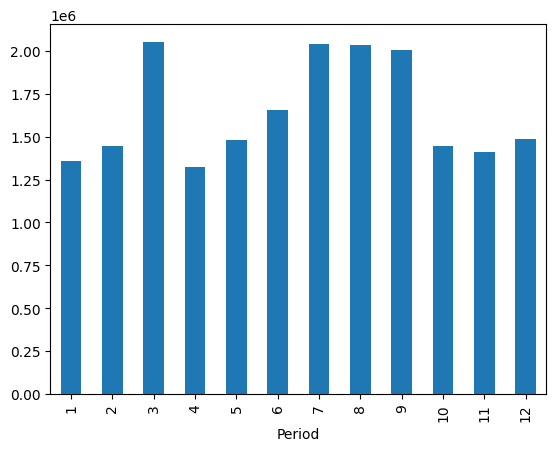

In [162]:
# Is spend evenly distributed or are there seasonal patterns / gaps?
df.groupby("Period")["EUR"].sum().plot(kind="bar")

In [164]:
# How many suppliers, and is spend concentrated?
print(f"Unique suppliers: {df['Supplier Name'].nunique()}")

Unique suppliers: 128


In [ ]:
# Top 10 suppliers by spend
df.groupby("Supplier Name")["EUR"].sum().nlargest(10).sort_values(ascending=False)

Supplier Name
Deufol West GmbH                    3.118929e+06
Mueller-Zeiner                      2.058021e+06
DHL Express (Sweden) AB             1.675037e+06
DHL Freight (Sweden) AB             1.187563e+06
GEODIS Sweden AB                    8.045593e+05
Deufol Nord GmbH                    7.240198e+05
duisport industrial solutions       6.159036e+05
SERCARGA SAS                        5.938438e+05
FRACHT FWO INC                      5.435972e+05
Heavylift Terminal Duisburg GmbH    4.665605e+05
Name: EUR, dtype: float64

In [168]:
# How many suppliers, and is spend concentrated?
print(f"Unique suppliers: {df['Supplier Name'].nunique()}")

Unique suppliers: 128


In [163]:
# Any periods with suspiciously low/high activity?
df.groupby("Period")["Purchase order number"].count()

Period
1     332
2     332
3     332
4     332
5     332
6     332
7     332
8     332
9     332
10    332
11    331
12    331
Name: Purchase order number, dtype: int64

In [171]:
# Negative values?
(df["EUR"] < 0).sum()

np.int64(0)

Should we expect Negative values?

For all categorical columns
 - Do we need to treat any category differently?
 - Are there special exceptions / rules we should be aware of?

For value / numerical columns:
 - How many decimal points should we use?
 - What type of rounding should we use?
 - Are there any thresholds you want to see clearly? Eg: show values that are over x, where x can be an average or some other number.


Possible Hierarchies: 
    1. Division -> Business Unit -> Business Area -> Organization ID -> Purchase order number
    2. Region -> Country -> Location type -> Location name
    3. ?

Only one location type in data sample, 
 - Are there more location types in the full data?

The most granular level we can go are to is the Purchase order number
 - Is there some missing hierarchy level that we might need that is not included in the data?
 - Where can we find data that includes that hierarchy level?
 - How do we map that missing hierarchy level?

No volume related data
 - Cannot determine cost per unit / shipment with provided data
 - Does one Purchase order number = one shipment ? 
 - Would volume data be needed?
 - Where could we get volume data from?
 - Does it contain order purchase nr for easier mapping or do we map it some other way?

Example questions we can answer with current data:
 - What's our total logistics spend by region, country, division, business unit?
 - Top n / Bottom n supliers by spend
 - What commodities drive the most cost?
 - Spending trend throughout the year
 - Where spending is concentrated by location

Example questions we cannot answer with current data:
- cost per shipment / unit / kg
- cost increase driver: price or shipment

Known issues
 - Are there any problematic scenarios that we should be aware of?